In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Step 1: Load the dataset
url = "sales_data_sample.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

In [2]:
# Step 2: Preprocess the data
features = df[['QUANTITYORDERED', 'PRICEEACH']].copy()
features.dropna(inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

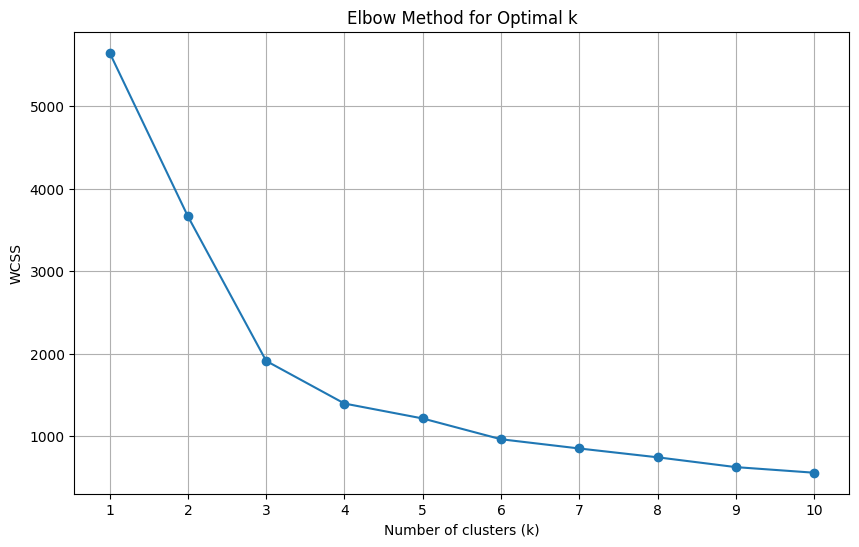

In [3]:
# Step 3: Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

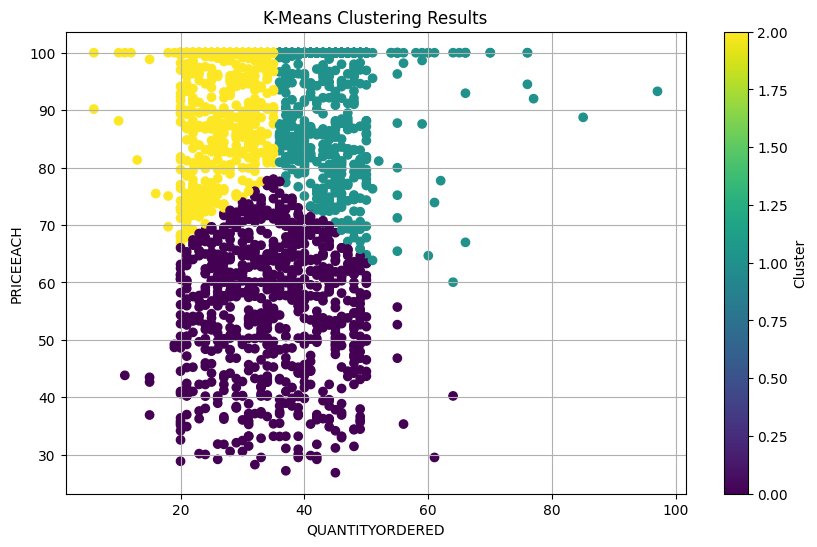

In [4]:
# Step 4: Apply K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('PRICEEACH')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

In [3]:
# Step 5: (Optional) Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(features_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid()
plt.show()

NameError: name 'features_scaled' is not defined